The following notebook presents a CFD study of the pressure-driven flow in a duct using Watertight meshing and Fluent solver -- using Python scripting in ANSYS PyFluent 

**Importing the required files**

In [1]:
import ansys.fluent.core as pyfluent
from matplotlib import pyplot as plt
from matplotlib import image
%matplotlib inline

**Starting the meshing session**

In [2]:
# Open a meshing session------------------------------
meshing_session = pyfluent.launch_fluent(precision = "double", processor_count = 4, mode = "meshing", show_gui = True)
workflow = meshing_session.workflow
meshing = meshing_session.meshing

pyfluent.launcher WARNING: PyFluent Watchdog did not initialize correctly, proceeding without it...


Setting the Watertight meshing workflow

In [3]:
# The meshing workflow is selected as the "Watertight Meshing Workflow"
workflow.InitializeWorkflow(WorkflowType = r'Watertight Geometry')
# The global scale setting
meshing.GlobalSettings.LengthUnit.set_state(r'mm')
meshing.GlobalSettings.AreaUnit.set_state(r'mm^2')
meshing.GlobalSettings.VolumeUnit.set_state(r'mm^3')

Importing geometry

In [4]:
workflow.TaskObject['Import Geometry'].Arguments.set_state({r'FileName': r'Project_3_DuctGeometry.scdoc',})
workflow.TaskObject['Import Geometry'].Execute()


Importing one geom object per program-controlled and one zone per body ...
    D:\\softwares\\ANSYS Inc\\ANSYS Student\\v231\\commonfiles\\CPython\\3_7\\winx64\\Release\\python\\..\\Ansys\\TGrid\\CADReaders.py started by NOTEBOOK on MSI winx64 on Fri Dec 15 19:10:53 2023
    using Python 3.7.13 (remotes/origin/3b89b4a151d5e27a7d119919e370e421549562b8-dirty:3b89b4a1, Sep 23 2) [MSC v.1920 64 bit (AMD64)]
    
    using Ansys.Meshing.FieldMesher build Nov 23 2022 18:41:14
    
    running ANSYS TGrid CADToTGridConverter ...
    setting up parameters ...
    setting up parameters done.
    running conversion ...
    converting 1 file(s) from Workbench to FLTG using output path 'D:\\McGill_MSc Thesis\\coursera\\ANSYS_pyScript\\week_3_pressure driven flow in duct\\FM_MSI_13764/out170268545213764.tgf'
    converting file 'Project_3_DuctGeometry.scdoc' (1 of 1) from Workbench to FLTG using output path 'D:\\McGill_MSc Thesis\\coursera\\ANSYS_pyScript\\week_3_pressure driven flow in duct\\FM_M

True

Local sizing - adding the BOIs in the geometry

In [5]:
#local sizing- setting up Body of Infulence for refining the mesh  ------------------------------------------
# 1st BOI
workflow.TaskObject['Add Local Sizing'].Arguments.set_state({r'AddChild': r'yes',r'BOIExecution': r'Body Of Influence',r'BOIFaceLabelList': \
                                                             [r'boi_1-solid1'],r'BOISize': 1,})
workflow.TaskObject['Add Local Sizing'].AddChildAndUpdate()   # executing the BOI - 1
# 2nd BOI
'''
workflow.TaskObject['Add Local Sizing'].Arguments.set_state({r'AddChild': r'yes',r'BOIExecution': r'Body Of Influence',r'BOIFaceLabelList': \
                                                             [r'boi_2-solid'],r'BOISize': 1,})
workflow.TaskObject['Add Local Sizing'].AddChildAndUpdate()  # executing the BOI - 2
'''


---------------- A Body of Influence with a target size of 1 was added to: boi_1-solid1


"\nworkflow.TaskObject['Add Local Sizing'].Arguments.set_state({r'AddChild': r'yes',r'BOIExecution': r'Body Of Influence',r'BOIFaceLabelList':                                                              [r'boi_2-solid'],r'BOISize': 1,})\nworkflow.TaskObject['Add Local Sizing'].AddChildAndUpdate()  # executing the BOI - 2\n"

The surface meshing

In [6]:
# -------Surface mesh --- Cells per gap, Curvature Normal angle, max size, min size ---------------------------------------
workflow.TaskObject['Generate the Surface Mesh'].Arguments.set_state({r'CFDSurfaceMeshControls': {r'CellsPerGap': 5,r'CurvatureNormalAngle': \
                                                                                                  10,r'MaxSize': 10, \
                                                                                                  r'MinSize': 2.5,},})
workflow.TaskObject['Generate the Surface Mesh'].Execute()


Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\TaskObject3.msh.h5" ...
writing 1 node zones
writing 13 edge zones 
writing 7 face zones 
done.
---------------- The Global Max size was adjusted to 10 
    processing size functions/scoped sizing to create Size Field...

Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\Project_3_DuctGeometry.sf"...
Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\Project_3_DuctGeometry.sf"...
Done.


Importing one mesh object per program-controlled and one zone per body ...
    D:\\softwares\\ANSYS Inc\\ANSYS Student\\v231\\commonfiles\\CPython\\3_7\\winx64\\Release\\python\\..\\Ansys\\TGrid\\CADReaders.py started by NOTEBOOK on MSI winx64 on Fri Dec 15 19:11:32 2023
    using Python 3.7.13 (remotes/origin/3b89b4a151d5e27a7d119919e370e421549562b8-dirty:3b89b4a1, Sep 23 2) [MSC v.1920 64 bit (AM

True

In [7]:
# Can revert using the following command
workflow.TaskObject['Generate the Surface Mesh'].Revert()

Reading "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\TaskObject3.msh.h5" ...
3D mesh
nodes: 320
edges: 168
faces: 312 
cells: 0 
reading 1 node zones
reading 13 edge zones
reading 7 face zones
generating pointers...done.
extracting boundary entities...
 320 boundary nodes.
 312 boundary faces.
 7 boundary face zones.
done.
analyzing boundary connectivity...done.


False

In [8]:
# -------Surface mesh --- Cells per gap, Curvature Normal angle, max size, min size ---------------------------------------
workflow.TaskObject['Generate the Surface Mesh'].Arguments.set_state({r'CFDSurfaceMeshControls': {r'CellsPerGap': 5,r'CurvatureNormalAngle': \
                                                                                                  10,r'MaxSize': 10, \
                                                                                                  r'MinSize': 2.5,},})
workflow.TaskObject['Generate the Surface Mesh'].Execute()


Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\TaskObject3.msh.h5" ...
writing 1 node zones
writing 13 edge zones 
writing 7 face zones 
done.
---------------- The Global Max size was adjusted to 10 
    processing size functions/scoped sizing to create Size Field...

Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\Project_3_DuctGeometry.sf"...
Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\Project_3_DuctGeometry.sf"...
Done.


Importing one mesh object per program-controlled and one zone per body ...
    D:\\softwares\\ANSYS Inc\\ANSYS Student\\v231\\commonfiles\\CPython\\3_7\\winx64\\Release\\python\\..\\Ansys\\TGrid\\CADReaders.py started by NOTEBOOK on MSI winx64 on Fri Dec 15 19:11:43 2023
    using Python 3.7.13 (remotes/origin/3b89b4a151d5e27a7d119919e370e421549562b8-dirty:3b89b4a1, Sep 23 2) [MSC v.1920 64 bit (AM

True

Describe geometry task

In [9]:
workflow.TaskObject['Describe Geometry'].UpdateChildTasks(SetupTypeChanged=False)
workflow.TaskObject['Describe Geometry'].Arguments.set_state({r'SetupType': r'The geometry consists of only fluid regions with no voids',})
workflow.TaskObject['Describe Geometry'].UpdateChildTasks(SetupTypeChanged=True)
workflow.TaskObject['Describe Geometry'].Execute()


---------------- Velocity-inlet zone type was automatically assigned to zones containing the string 'inlet'.

---------------- Pressure-outlet zone type was automatically assigned to zones containing the string 'outlet'.

---------------- Symmetry zone type was automatically assigned to zones containing the string 'symmetry'.


True

Update boundaries

In [10]:
workflow.TaskObject['Update Boundaries'].Arguments.set_state({r'BoundaryLabelList': [r'wall_lower'], \
                                                              r'BoundaryLabelTypeList': [r'symmetry'],r'OldBoundaryLabelList': \
                                                              [r'wall_lower'],r'OldBoundaryLabelTypeList': [r'wall'],})
workflow.TaskObject['Update Boundaries'].Execute()
workflow.TaskObject['Update Regions'].Execute()


---------------- Boundary Conditions Updated

---------------- Regions Updated


True

Add Boundary layers

In [11]:
# using last ratio method, changing the number of layers to 5, first height - 0.5 mm, transition ratio - 0.2, other setting default
workflow.TaskObject['Add Boundary Layers'].Arguments.set_state({r'FirstHeight': 0.5,r'LocalPrismPreferences': \
                                                                {r'Continuous': r'Stair Step',},r'NumberOfLayers': 5, \
                                                                r'OffsetMethodType': r'last-ratio',r'TransitionRatio': 0.2,})
workflow.TaskObject['Add Boundary Layers'].AddChildAndUpdate()

# using smooth transition method, changing the number of layers to 5, keeping the other settings ad default
#workflow.TaskObject['Add Boundary Layers'].Arguments.set_state({r'LocalPrismPreferences': {r'Continuous': r'Stair Step',},r'NumberOfLayers': 5,})
#workflow.TaskObject['Add Boundary Layers'].AddChildAndUpdate()


Created Scoped Prism: last-ratio_1

---------------- Inflation control added to project_3_ductgeometry-duct1


True

Generate the volume mesh

In [12]:
# poly hexcore as volume fill with method, keeping the minimum size default, maximum size as 4 mm
workflow.TaskObject['Generate the Volume Mesh'].Arguments.set_state({r'VolumeFill': r'poly-hexcore', \
                                                                     r'VolumeFillControls': {r'HexMaxCellLength': 8, \
                                                                                             r'HexMinCellLength': 1,r'PeelLayers': 2,},})
workflow.TaskObject['Generate the Volume Mesh'].Execute()

Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\TaskObject11.msh.h5" ...
writing 3 node zones
writing 26 edge zones 
writing 13 face zones 
done.    processing size functions/scoped sizing to create Size Field...

Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\Project_3_DuctGeometry.sf"...
Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\Project_3_DuctGeometry.sf"...
Done.


    updating regions...
    done.
checking object "project_3_ductgeometry-duct1"...
    skipping validating regions of mesh object "project_3_ductgeometry-duct1"...done.
auto meshing object project_3_ductgeometry-duct1...

processing scoped prisms...
    starting orientation...done.
    setting prism growth...done.
done.
Identifying Topology...

The octree hexcore cells will be refined using the computed Size Field.
Generating Prisms...

Generating init

True

In [13]:
workflow.TaskObject['Generate the Volume Mesh'].Revert()

Reading "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\TaskObject11.msh.h5" ...
3D mesh
nodes: 47974
edges: 1901
faces: 46184 
cells: 0 
reading 3 node zones
reading 26 edge zones
reading 13 face zones
generating pointers...done.
extracting boundary entities...
 47974 boundary nodes.
 46184 boundary faces.
 13 boundary face zones.
done.
analyzing boundary connectivity...done.


False

In [14]:
# poly hexcore as volume fill with method, keeping the minimum size default, maximum size as 4 mm
workflow.TaskObject['Generate the Volume Mesh'].Arguments.set_state({r'VolumeFill': r'poly-hexcore', \
                                                                     r'VolumeFillControls': {r'HexMaxCellLength': 8, \
                                                                                             r'HexMinCellLength': 1,r'PeelLayers': 2,},})
workflow.TaskObject['Generate the Volume Mesh'].Execute()

Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\TaskObject11.msh.h5" ...
writing 3 node zones
writing 26 edge zones 
writing 13 face zones 
done.    processing size functions/scoped sizing to create Size Field...

Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\Project_3_DuctGeometry.sf"...
Writing "D:\McGill_MSc Thesis\coursera\ANSYS_pyScript\week_3_pressure driven flow in duct\FM_MSI_13764\Project_3_DuctGeometry.sf"...
Done.


    updating regions...
    done.
checking object "project_3_ductgeometry-duct1"...
    skipping validating regions of mesh object "project_3_ductgeometry-duct1"...done.
auto meshing object project_3_ductgeometry-duct1...

processing scoped prisms...
    starting orientation...done.
    setting prism growth...done.
done.
Identifying Topology...

The octree hexcore cells will be refined using the computed Size Field.
Generating Prisms...

Generating init

True

**Switching to solver mode**

In [15]:
solver = meshing_session.switch_to_solver()


Preparing...

unused zone boundary-node-24 removed
Multicore SMT processors detected. Processor affinity set!

Transferring mesh
	transferring nodes... done
	creating threads... done
	transferring faces... done
	transferring cells... done
	updating face to cell connectivity... done
	updating grid metrics...  done
	post mesh transfer operations... done
done

     materials,
     interface,
     domains,
     zones,
	wall_left
	wall_right
	wall_lower
	symmetry_upper
	outlet
	inlet
	interior--duct1
	duct1
     surfaces,
     parallel,
Done.
Mesh is now scaled to meters.


changing the scale of geometry and check the mesh

In [16]:
solver.tui.define.units("length","mm")
solver.mesh.check()



> 
 Domain Extents:
   x-coordinate: min (m) = -1.224606e-18, max (m) = 2.200000e-01
   y-coordinate: min (m) = -2.200000e-01, max (m) = 2.000000e-02
   z-coordinate: min (m) = -2.000000e-02, max (m) = 0.000000e+00
 Volume statistics:
   minimum volume (m3): 6.546066e-11
   maximum volume (m3): 2.384494e-07
     total volume (m3): 3.188328e-04
 Face area statistics:
   minimum face area (m2): 2.471453e-09
   maximum face area (m2): 4.172360e-05
 Checking mesh.....................................
Done.

Note: Settings to improve the robustness of pathline and
      particle tracking have been automatically enabled.



'*the-non-printing-object*'

In [17]:
solver.mesh.quality()

 
Mesh Quality:

Minimum Orthogonal Quality =  3.39706e-01 cell 25149 on zone 198 (ID: 863448 on partition: 0) at location ( 1.60701e-01,  1.47382e-02, -1.25450e-02)



False

Maximum Aspect Ratio =  1.11857e+01 cell 40618 on zone 198 (ID: 799061 on partition: 1) at location ( 1.80250e-01, -2.08072e-01, -7.65886e-03)


Viscous model selection

In [18]:
solver.setup.models.viscous()

{'model': 'k-omega',
 'options': {'curvature_correction': False,
  'corner_flow_correction': False,
  'production_kato_launder': False},
 'k_omega_model': 'sst',
 'k_omega_options': {'kw_low_re_correction': False},
 'transition_module': 'none',
 'turbulence_expert': {'kato_launder_model': False,
  'production_limiter': {'enable_prod_limiter': True, 'clip_factor': 10.0},
  'turb_non_newtonian': False,
  'restore_sst_v61': False},
 'user_defined': {'turb_visc_func': 'none'}}

we need to change the model to 'laminar'

In [19]:
solver.setup.models.viscous.model = "laminar"

In [20]:
solver.setup.models.viscous()

{'model': 'laminar', 'options': None}

Assinging the material in the fluid domain

In [21]:
solver.setup.materials()

{'database': {'database_type': 'fluent-database'},
 'fluid': {'air': {'density': {'option': 'constant', 'value': 1.225},
   'viscosity': {'option': 'constant', 'value': 1.7894e-05},
   'specific_heat': {'option': 'constant', 'value': 1006.43},
   'thermal_conductivity': {'option': 'constant', 'value': 0.0242},
   'molecular_weight': {'option': 'constant', 'value': 28.966},
   'therm_exp_coeff': {'option': 'constant', 'value': 0},
   'speed_of_sound': {'option': 'none'}}},
 'solid': {'aluminum': {'density': {'option': 'constant', 'value': 2719},
   'specific_heat': {'option': 'constant', 'value': 871},
   'thermal_conductivity': {'option': 'constant', 'value': 202.4}}}}

Setting the boundary conditions - Velocity - 1 m/s, gauge pressure = 10 Pa

In [22]:
# setting the velocity magnitude as 10 m/s
solver.setup.boundary_conditions.velocity_inlet['inlet'].vmag = 1
solver.setup.boundary_conditions.velocity_inlet['inlet'].initial_gauge_pressure = 10
# check, if the velocity magnitude has been changed
solver.setup.boundary_conditions.velocity_inlet()

{'inlet': {'velocity_spec': 'Magnitude, Normal to Boundary',
  'frame_of_reference': 'Absolute',
  'vmag': {'option': 'value', 'value': 1},
  'initial_gauge_pressure': {'option': 'value', 'value': 10}}}

Changing the gauge pressure of the pressure outlet - 10 Pa

In [23]:
solver.setup.boundary_conditions.pressure_outlet()

{'outlet': {'frame_of_reference': 'Absolute',
  'gauge_pressure': {'option': 'value', 'value': 0},
  'p_profile_multiplier': 1.0,
  'direction_spec': 'Normal to Boundary',
  'p_backflow_spec_gen': 'Total Pressure',
  'prevent_reverse_flow': False,
  'radial': False,
  'avg_press_spec': False,
  'targeted_mf_boundary': False}}

In [24]:
solver.setup.boundary_conditions.pressure_outlet['outlet'].gauge_pressure = 10
solver.setup.boundary_conditions.pressure_outlet()

{'outlet': {'frame_of_reference': 'Absolute',
  'gauge_pressure': {'option': 'value', 'value': 10},
  'p_profile_multiplier': 1.0,
  'direction_spec': 'Normal to Boundary',
  'p_backflow_spec_gen': 'Total Pressure',
  'prevent_reverse_flow': False,
  'radial': False,
  'avg_press_spec': False,
  'targeted_mf_boundary': False}}

Initialize the solution - 'Hybrid Initialization'

In [25]:
solver.solution.initialization.hybrid_initialize()


Initialize using the hybrid initialization method.

Checking case topology... 
-This case has both inlets & outlets 
-Pressure information is not available at the boundaries.
 Case will be initialized with constant pressure

	iter		scalar-0

	1		1.000000e+00
	2		4.115022e-05
	3		1.993627e-06
	4		2.084891e-06
	5		2.038845e-07
	6		3.108990e-07
	7		2.347553e-08
	8		3.332044e-08
	9		2.920895e-09
	10		4.446816e-09

Hybrid initialization is done.


setting the no of iterations and run calculation

In [26]:
solver.solution.run_calculation.iter_count = 400
solver.solution.run_calculation.iterate()


  iter  continuity  x-velocity  y-velocity  z-velocity     time/iter
     1  1.0000e+00  1.3495e-03  1.4344e-03  2.5226e-05  0:13:18  399
     2  9.2826e-01  8.4084e-04  8.4992e-04  2.1229e-05  0:13:16  398
     3  7.5883e-01  5.4999e-04  5.4778e-04  1.8192e-05  0:11:55  397
     4  6.4784e-01  3.8549e-04  3.9150e-04  1.3589e-05  0:12:09  396
     5  5.7691e-01  2.8880e-04  3.0861e-04  9.2385e-06  0:11:00  395
     6  5.1689e-01  2.2903e-04  2.5974e-04  6.0648e-06  0:10:06  394
     7  4.6621e-01  1.8942e-04  2.2786e-04  4.1336e-06  0:09:22  393
     8  4.2821e-01  1.6023e-04  2.0232e-04  3.3517e-06  0:10:05  392
     9  4.0269e-01  1.4022e-04  1.8443e-04  2.9236e-06  0:09:21  391
    10  3.8335e-01  1.2514e-04  1.7128e-04  2.6082e-06  0:08:46  390
    11  3.6729e-01  1.1396e-04  1.6218e-04  2.3322e-06  0:09:35  389

  iter  continuity  x-velocity  y-velocity  z-velocity     time/iter
    12  3.5420e-01  1.0487e-04  1.5508e-04  2.1483e-06  0:08:57  388
    13  3.4394e-01  9.7767e-05  

Save the case and data file to the folder

In [27]:
#solver.file.write(file_type = 'case-data', file_name = "Project_3_PressureDrivenFlow_duct.cas.h5")

Saving and displaying the residual plot

In [28]:
#solver.results.graphics.picture.save_picture(file_name = "Residual Plot")

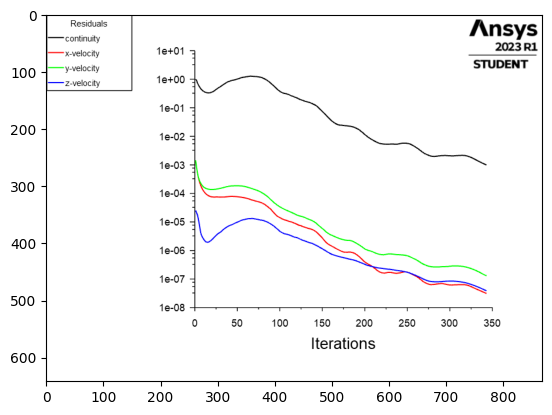

In [30]:
plt.imshow(image.imread("Residual Plot.png"))

In [32]:
solver.results.plot.xy_plot.create("Pressure-plot")
solver.results.plot.xy_plot["Pressure-plot"](y_axis_function = "pressure", surfaces_list = ["wall_left","wall_right"])
solver.results.plot.xy_plot["Pressure-plot"].display()

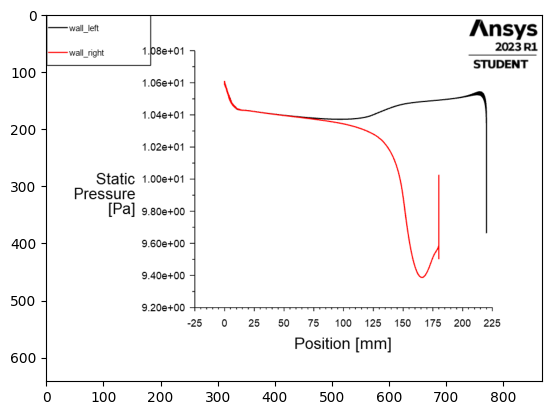

In [33]:
solver.results.graphics.picture.save_picture(file_name = "Pressure-plot")
plt.imshow(image.imread("Pressure-plot.png"))

In [37]:
solver.results.plot.xy_plot.create("wall-shear-stress")
solver.results.plot.xy_plot["wall-shear-stress"](y_axis_function = "wall-shear", surfaces_list = ["wall_left","wall_right"])
solver.results.plot.xy_plot["wall-shear-stress"].display()

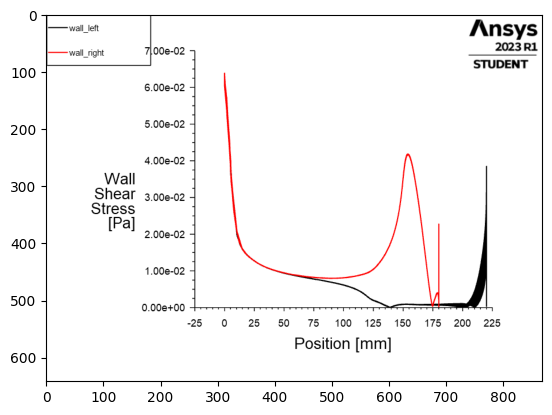


Posting ANSYS Product Improvement Program performance data 
Done.
Shutting down Server...


In [38]:
solver.results.graphics.picture.save_picture(file_name = "Wall shear stess-plot")
plt.imshow(image.imread("Wall shear stess-plot.png"))